In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from sklearn.mixture import GaussianMixture

In [24]:
data = pd.read_csv("credit_card_data.csv")
cluster_data = data[['CUST_ID','PURCHASES_TRX','CASH_ADVANCE_TRX']]

In [25]:
cluster_data.fillna(0, inplace=True)


C:\Users\Asiri Pramodaya\AppData\Local\Temp\ipykernel_20932\1900456280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.fillna(0, inplace=True)


In [26]:
customer_ids = cluster_data['CUST_ID']
cluster_data = cluster_data.drop('CUST_ID',axis=1)

In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

In [28]:
scaled_data

array([[-0.51133325, -0.47606982],
       [-0.59179588,  0.11007385],
       [-0.10902012, -0.47606982],
       ...,
       [-0.39063931, -0.47606982],
       [-0.59179588, -0.18299798],
       [ 0.33352433, -0.18299798]])

In [32]:
wcss = [] #within cluster sum of squares 
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

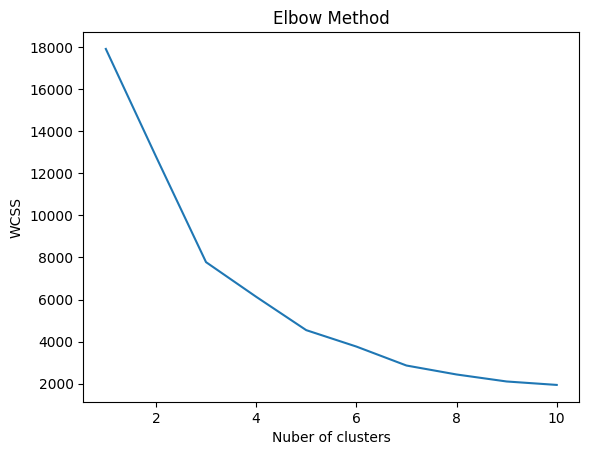

In [33]:
plt.plot(range(1,11), wcss) #within cluster sum of squares
plt.title('Elbow Method')
plt.xlabel('Nuber of clusters')
plt.ylabel('WCSS')
plt.show()